In [38]:
#Load Data
#import csv
#dfile = open('train.csv', 'rb')
#reader = csv.reader(dfile, delimiter=',')
#data = []
def loadData(fname):
    import csv
    dfile = open('train.csv', 'rb')
    reader = csv.reader(dfile, delimiter=',')
    data = []
    
    for row in reader:
        data.append(row)
    
    import numpy as np
    ndata = np.array(data)
    
    # Buld xSet and ySet
    ys = ndata[1:,1]
    ys = ys.reshape(len(ys),1)
    xs = np.transpose([ndata[1:,2], ndata[1:,4], ndata[1:,5]])
    
    return (xs,ys)
    
(xs, ys) = loadData('train.csv')

#xs = encode1hotColumn(1, xs, ['male', 'female'])
#(xs, ys) = cleanDataFromColumn(1,xs,ys)
#xs = xs.astype('float32')
#ys = ys.astype('float32')
#xs = normalizeCol(1, xs)
#xs = normalizeCol(0, xs)

#(trainXs,trainYs,validXs,validYs) = splitData(xs,ys,550)


Max Edad: 80.0
Min Edad: 0.42
Max Edad: 3.0
Min Edad: 1.0


In [10]:
for row in reader:
    data.append(row)

In [11]:
data[0:5]

[['PassengerId',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked'],
 ['1',
  '0',
  '3',
  'Braund, Mr. Owen Harris',
  'male',
  '22',
  '1',
  '0',
  'A/5 21171',
  '7.25',
  '',
  'S'],
 ['2',
  '1',
  '1',
  'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
  'female',
  '38',
  '1',
  '0',
  'PC 17599',
  '71.2833',
  'C85',
  'C'],
 ['3',
  '1',
  '3',
  'Heikkinen, Miss. Laina',
  'female',
  '26',
  '0',
  '0',
  'STON/O2. 3101282',
  '7.925',
  '',
  'S'],
 ['4',
  '1',
  '1',
  'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
  'female',
  '35',
  '1',
  '0',
  '113803',
  '53.1',
  'C123',
  'S']]

In [12]:
import numpy as np
ndata = np.array(data)
ndata

array([['PassengerId', 'Survived', 'Pclass', ..., 'Fare', 'Cabin',
        'Embarked'],
       ['1', '0', '3', ..., '7.25', '', 'S'],
       ['2', '1', '1', ..., '71.2833', 'C85', 'C'],
       ...,
       ['889', '0', '3', ..., '23.45', '', 'S'],
       ['890', '1', '1', ..., '30', 'C148', 'C'],
       ['891', '0', '3', ..., '7.75', '', 'Q']], dtype='|S82')

In [13]:
ndata[1:6,1]

array(['0', '1', '1', '1', '0'], dtype='|S82')

In [26]:
# Buld xSet and ySet
ys = ndata[1:,1]
ys = ys.reshape(len(ys),1)
xs = np.transpose([ndata[1:,2], ndata[1:,4], ndata[1:,5]])

# Change Gender String tags to 1-hot encoding
def encode1hotColumn(col, xs, possibles):
    encarr = np.zeros((len(xs),len(possibles)))
    for i in range(len(xs)):
        pos = possibles.index(xs[i,1])
        if pos != -1:
            encarr[i,pos] = 1
        else:
            print "SUPER ERROR! Not Able to Find '"+xs[i,1]+"'"
    xs = np.delete(xs,1,1)
    xs = np.append(xs, encarr, axis=1)
    return xs
#encarr = np.zeros((len(xs),2))
#for i in range(len(xs)):
#    if xs[i,1] == 'male':
#        encarr[i,0] = 1
#        encarr[i,1] = 0
#    else:
#        encarr[i,0] = 0
#        encarr[i,1] = 1

#xs = np.delete(xs,1,1)
#xs = np.append(xs, encarr, axis=1)

xs = encode1hotColumn(1, xs, ['male', 'female'])

# Remove Invalid X's with null age
def cleanDataFromColumn(col, xs,ys):
    missing = []
    (h,w) = xs.shape
    for i in xrange(h):
        if xs[i,col] == '':
            missing.append(i)
    xs = np.delete(xs, missing, 0)
    ys = np.delete(ys, missing, 0)
    return (xs, ys)

(xs, ys) = cleanDataFromColumn(1,xs,ys)
xs = xs.astype('float32')
ys = ys.astype('float32')
# Normalize Values to 0-1
# Normalize Edad

def normalizeCol(col, xs):
    maxEdad = np.amax(xs[:,col])
    minEdad = np.amin(xs[:,col])

    print "Max Edad: " + str(maxEdad)
    print "Min Edad: " + str(minEdad)

    xs[:,col] = (xs[:,col] - minEdad) / (maxEdad - minEdad)
    return xs

xs = normalizeCol(1, xs)

# Normalize PClass
xs = normalizeCol(0, xs)
#maxClass= np.amax(xs[:,0])
#minClass= np.amin(xs[:,0])

#xs[:,0] = (xs[:,0] - minClass) / (maxClass - minClass)




#xs = np.delete(xs,[0,1],1)
xs[:5]
samples = np.append(xs, ys, axis=1)
samples[:20]

Max Edad: 80.0
Min Edad: 0.42
Max Edad: 3.0
Min Edad: 1.0


array([[1.        , 0.27117366, 1.        , 0.        , 0.        ],
       [0.        , 0.4722292 , 0.        , 1.        , 1.        ],
       [1.        , 0.32143754, 0.        , 1.        , 1.        ],
       [0.        , 0.4345313 , 0.        , 1.        , 1.        ],
       [1.        , 0.4345313 , 1.        , 0.        , 0.        ],
       [0.        , 0.67328477, 1.        , 0.        , 0.        ],
       [1.        , 0.01985423, 1.        , 0.        , 0.        ],
       [1.        , 0.3340035 , 0.        , 1.        , 1.        ],
       [0.5       , 0.1706459 , 0.        , 1.        , 1.        ],
       [1.        , 0.04498618, 0.        , 1.        , 1.        ],
       [0.        , 0.72354865, 0.        , 1.        , 1.        ],
       [1.        , 0.24604172, 1.        , 0.        , 0.        ],
       [1.        , 0.48479518, 1.        , 0.        , 0.        ],
       [1.        , 0.1706459 , 0.        , 1.        , 0.        ],
       [0.5       , 0.68585074, 0.

In [36]:
def splitData(xs,ys,n):
    trainXs = xs[:n]
    trainYs = ys[:n]
    #trainYs = trainYs.reshape(len(trainYs),1)
    validXs = xs[n:]
    validYs = ys[n:]
    return (trainXs, trainYs, validXs, validYs)
#validYs = validYs.reshape(len(validYs),1)

(trainXs,trainYs,validXs,validYs) = splitData(xs,ys,550)
trainXs.shape

(550, 4)

In [39]:
import neuralnet as nn
nnet = nn.NeuralNet(4)
nnet.addLayer(4)
nnet.addLayer(2)
nnet.addLayer(1)

In [40]:
# Train Neural Net Model
(terr, verr) = nnet.train('m',trainXs.tolist(),trainYs.tolist(),validXs.tolist(),validYs.tolist(),1500,0.2)

Epoch #1 - Train Error: 0.352276597695 - Valid Error: 0.342610753112
Epoch #1 - Train Accuracy: 0.409090909091 - Valid Accuracy: 0.396341463415
Epoch #2 - Train Error: 0.325513233435 - Valid Error: 0.316492307521
Epoch #2 - Train Accuracy: 0.409090909091 - Valid Accuracy: 0.396341463415
Epoch #3 - Train Error: 0.302488819627 - Valid Error: 0.294869382425
Epoch #3 - Train Accuracy: 0.409090909091 - Valid Accuracy: 0.396341463415
Epoch #4 - Train Error: 0.28419979006 - Valid Error: 0.278463673658
Epoch #4 - Train Accuracy: 0.409090909091 - Valid Accuracy: 0.396341463415
Epoch #5 - Train Error: 0.270866317621 - Valid Error: 0.266658659939
Epoch #5 - Train Accuracy: 0.409090909091 - Valid Accuracy: 0.396341463415
Epoch #6 - Train Error: 0.261331945059 - Valid Error: 0.258121333965
Epoch #6 - Train Accuracy: 0.409090909091 - Valid Accuracy: 0.396341463415
Epoch #7 - Train Error: 0.254883707253 - Valid Error: 0.252442719355
Epoch #7 - Train Accuracy: 0.409090909091 - Valid Accuracy: 0.396341

Epoch #60 - Train Error: 0.241303395202 - Valid Error: 0.238966387925
Epoch #60 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #61 - Train Error: 0.241344531734 - Valid Error: 0.238953324508
Epoch #61 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #62 - Train Error: 0.241341283721 - Valid Error: 0.238937207185
Epoch #62 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #63 - Train Error: 0.241304262216 - Valid Error: 0.238929477725
Epoch #63 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #64 - Train Error: 0.241280947037 - Valid Error: 0.238921009712
Epoch #64 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #65 - Train Error: 0.241284365913 - Valid Error: 0.238909278206
Epoch #65 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #66 - Train Error: 0.241272149 - Valid Error: 0.23889280527
Epoch #66 - Train Accuracy: 0.590909090909 - Valid Accurac

Epoch #116 - Train Error: 0.240634735847 - Valid Error: 0.238210376736
Epoch #116 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #117 - Train Error: 0.240638493334 - Valid Error: 0.238193040522
Epoch #117 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #118 - Train Error: 0.240658345443 - Valid Error: 0.238173053675
Epoch #118 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #119 - Train Error: 0.240596452617 - Valid Error: 0.238162987122
Epoch #119 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #120 - Train Error: 0.240571116981 - Valid Error: 0.238144398502
Epoch #120 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #121 - Train Error: 0.240573932441 - Valid Error: 0.238127310544
Epoch #121 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #122 - Train Error: 0.240541498271 - Valid Error: 0.238107051839
Epoch #122 - Train Accuracy: 0.5909090909

Epoch #172 - Train Error: 0.239543716844 - Valid Error: 0.236994887454
Epoch #172 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #173 - Train Error: 0.239553818723 - Valid Error: 0.236960838672
Epoch #173 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #174 - Train Error: 0.239502776301 - Valid Error: 0.236926888417
Epoch #174 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #175 - Train Error: 0.239441555871 - Valid Error: 0.236901887588
Epoch #175 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #176 - Train Error: 0.239438225595 - Valid Error: 0.236871987189
Epoch #176 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #177 - Train Error: 0.239394350221 - Valid Error: 0.236836205608
Epoch #177 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #178 - Train Error: 0.239386555215 - Valid Error: 0.236806471147
Epoch #178 - Train Accuracy: 0.5909090909

Epoch #231 - Train Error: 0.237057436576 - Valid Error: 0.234238313877
Epoch #231 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #232 - Train Error: 0.237001894697 - Valid Error: 0.234166107805
Epoch #232 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #233 - Train Error: 0.236879914455 - Valid Error: 0.234093223255
Epoch #233 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #234 - Train Error: 0.236842336458 - Valid Error: 0.234016443729
Epoch #234 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #235 - Train Error: 0.23674075447 - Valid Error: 0.233936884933
Epoch #235 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #236 - Train Error: 0.23674190696 - Valid Error: 0.233871110607
Epoch #236 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #237 - Train Error: 0.236643142546 - Valid Error: 0.233783430643
Epoch #237 - Train Accuracy: 0.590909090909

Epoch #288 - Train Error: 0.230544529328 - Valid Error: 0.22705935281
Epoch #288 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #289 - Train Error: 0.230339988765 - Valid Error: 0.226848922296
Epoch #289 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #290 - Train Error: 0.230117127267 - Valid Error: 0.226636606407
Epoch #290 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #291 - Train Error: 0.229911706104 - Valid Error: 0.226410504869
Epoch #291 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #292 - Train Error: 0.229671631397 - Valid Error: 0.226177813001
Epoch #292 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #293 - Train Error: 0.229449931437 - Valid Error: 0.225942315262
Epoch #293 - Train Accuracy: 0.590909090909 - Valid Accuracy: 0.603658536585
Epoch #294 - Train Error: 0.229238459365 - Valid Error: 0.225711564647
Epoch #294 - Train Accuracy: 0.59090909090

Epoch #345 - Train Error: 0.210517674952 - Valid Error: 0.204885929553
Epoch #345 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.810975609756
Epoch #346 - Train Error: 0.209987743617 - Valid Error: 0.204267561402
Epoch #346 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.810975609756
Epoch #347 - Train Error: 0.209459366306 - Valid Error: 0.203658580641
Epoch #347 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.810975609756
Epoch #348 - Train Error: 0.208921346991 - Valid Error: 0.203035162467
Epoch #348 - Train Accuracy: 0.78 - Valid Accuracy: 0.810975609756
Epoch #349 - Train Error: 0.208285758182 - Valid Error: 0.202401031475
Epoch #349 - Train Accuracy: 0.781818181818 - Valid Accuracy: 0.823170731707
Epoch #350 - Train Error: 0.207746180351 - Valid Error: 0.201765934045
Epoch #350 - Train Accuracy: 0.781818181818 - Valid Accuracy: 0.810975609756
Epoch #351 - Train Error: 0.207232007722 - Valid Error: 0.201127236021
Epoch #351 - Train Accuracy: 0.78 - Valid Accuracy:

Epoch #403 - Train Error: 0.178053127004 - Valid Error: 0.1680497049
Epoch #403 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #404 - Train Error: 0.177638115717 - Valid Error: 0.16757191798
Epoch #404 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #405 - Train Error: 0.177310986401 - Valid Error: 0.167107695507
Epoch #405 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #406 - Train Error: 0.176842049263 - Valid Error: 0.16664285788
Epoch #406 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #407 - Train Error: 0.176494941925 - Valid Error: 0.166186964985
Epoch #407 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #408 - Train Error: 0.176105984408 - Valid Error: 0.165743350112
Epoch #408 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #409 - Train Error: 0.175783925916 - Valid Error: 0.165304889549
Epoch #409 - Train Accuracy: 0.774545454545 -

Epoch #461 - Train Error: 0.163919483397 - Valid Error: 0.151186529116
Epoch #461 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #462 - Train Error: 0.163766046417 - Valid Error: 0.151019113126
Epoch #462 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #463 - Train Error: 0.163643068609 - Valid Error: 0.150856046465
Epoch #463 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #464 - Train Error: 0.163575252806 - Valid Error: 0.150692280391
Epoch #464 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #465 - Train Error: 0.163373479673 - Valid Error: 0.150530062854
Epoch #465 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #466 - Train Error: 0.163286748227 - Valid Error: 0.1503669201
Epoch #466 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #467 - Train Error: 0.163110792072 - Valid Error: 0.150206169866
Epoch #467 - Train Accuracy: 0.774545454545

Epoch #517 - Train Error: 0.157732682876 - Valid Error: 0.143879204831
Epoch #517 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #518 - Train Error: 0.157633953251 - Valid Error: 0.143772446676
Epoch #518 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #519 - Train Error: 0.157566627794 - Valid Error: 0.143677053105
Epoch #519 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #520 - Train Error: 0.157429319758 - Valid Error: 0.143569800548
Epoch #520 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #521 - Train Error: 0.157383978721 - Valid Error: 0.143459608093
Epoch #521 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #522 - Train Error: 0.157271626547 - Valid Error: 0.143357436326
Epoch #522 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #523 - Train Error: 0.157178507206 - Valid Error: 0.143254523744
Epoch #523 - Train Accuracy: 0.7745454545

Epoch #573 - Train Error: 0.153660708256 - Valid Error: 0.139101308147
Epoch #573 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #574 - Train Error: 0.153459886651 - Valid Error: 0.139034204264
Epoch #574 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #575 - Train Error: 0.1534214892 - Valid Error: 0.138965369252
Epoch #575 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #576 - Train Error: 0.153374647272 - Valid Error: 0.138904958589
Epoch #576 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #577 - Train Error: 0.153282501016 - Valid Error: 0.138837838094
Epoch #577 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #578 - Train Error: 0.153203978717 - Valid Error: 0.138766205463
Epoch #578 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #579 - Train Error: 0.153123063105 - Valid Error: 0.138698676955
Epoch #579 - Train Accuracy: 0.774545454545

Epoch #631 - Train Error: 0.15062425927 - Valid Error: 0.135781748837
Epoch #631 - Train Accuracy: 0.772727272727 - Valid Accuracy: 0.798780487805
Epoch #632 - Train Error: 0.150626616656 - Valid Error: 0.135741233985
Epoch #632 - Train Accuracy: 0.772727272727 - Valid Accuracy: 0.798780487805
Epoch #633 - Train Error: 0.150639632038 - Valid Error: 0.135700124963
Epoch #633 - Train Accuracy: 0.772727272727 - Valid Accuracy: 0.798780487805
Epoch #634 - Train Error: 0.150554278229 - Valid Error: 0.13566053727
Epoch #634 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #635 - Train Error: 0.150500276842 - Valid Error: 0.135617164056
Epoch #635 - Train Accuracy: 0.772727272727 - Valid Accuracy: 0.80487804878
Epoch #636 - Train Error: 0.150487234618 - Valid Error: 0.135581331244
Epoch #636 - Train Accuracy: 0.778181818182 - Valid Accuracy: 0.798780487805
Epoch #637 - Train Error: 0.150455256476 - Valid Error: 0.135538223731
Epoch #637 - Train Accuracy: 0.772727272727 

Epoch #690 - Train Error: 0.148866039506 - Valid Error: 0.133591351956
Epoch #690 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.810975609756
Epoch #691 - Train Error: 0.148745883858 - Valid Error: 0.133566902772
Epoch #691 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.810975609756
Epoch #692 - Train Error: 0.148811714518 - Valid Error: 0.133542617898
Epoch #692 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.810975609756
Epoch #693 - Train Error: 0.148746333724 - Valid Error: 0.133521140654
Epoch #693 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.810975609756
Epoch #694 - Train Error: 0.14876406997 - Valid Error: 0.133498099327
Epoch #694 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.810975609756
Epoch #695 - Train Error: 0.148711958566 - Valid Error: 0.133468007931
Epoch #695 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.810975609756
Epoch #696 - Train Error: 0.148761754905 - Valid Error: 0.133439151534
Epoch #696 - Train Accuracy: 0.78181818181

Epoch #748 - Train Error: 0.147634509843 - Valid Error: 0.13212505584
Epoch #748 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.810975609756
Epoch #749 - Train Error: 0.147622001764 - Valid Error: 0.132102553117
Epoch #749 - Train Accuracy: 0.790909090909 - Valid Accuracy: 0.810975609756
Epoch #750 - Train Error: 0.147593967793 - Valid Error: 0.132084470386
Epoch #750 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.810975609756
Epoch #751 - Train Error: 0.147599387102 - Valid Error: 0.132055108242
Epoch #751 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.817073170732
Epoch #752 - Train Error: 0.147532994799 - Valid Error: 0.132035521299
Epoch #752 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.817073170732
Epoch #753 - Train Error: 0.147594933066 - Valid Error: 0.13201592472
Epoch #753 - Train Accuracy: 0.781818181818 - Valid Accuracy: 0.817073170732
Epoch #754 - Train Error: 0.147551750487 - Valid Error: 0.131998222819
Epoch #754 - Train Accuracy: 0.78 - Valid A

Epoch #806 - Train Error: 0.146778293343 - Valid Error: 0.131071943821
Epoch #806 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.823170731707
Epoch #807 - Train Error: 0.146856537814 - Valid Error: 0.131066885007
Epoch #807 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #808 - Train Error: 0.146834324678 - Valid Error: 0.131054612573
Epoch #808 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.823170731707
Epoch #809 - Train Error: 0.14676546254 - Valid Error: 0.131035307617
Epoch #809 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.823170731707
Epoch #810 - Train Error: 0.146782949482 - Valid Error: 0.131010311239
Epoch #810 - Train Accuracy: 0.781818181818 - Valid Accuracy: 0.823170731707
Epoch #811 - Train Error: 0.146727484549 - Valid Error: 0.130992437926
Epoch #811 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.823170731707
Epoch #812 - Train Error: 0.146724128396 - Valid Error: 0.130970992941
Epoch #812 - Train Accuracy: 0.78545454545

Epoch #863 - Train Error: 0.146234325969 - Valid Error: 0.130279424992
Epoch #863 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #864 - Train Error: 0.146232741979 - Valid Error: 0.130276311832
Epoch #864 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #865 - Train Error: 0.146234333455 - Valid Error: 0.130256944516
Epoch #865 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.823170731707
Epoch #866 - Train Error: 0.146283592192 - Valid Error: 0.130259701857
Epoch #866 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #867 - Train Error: 0.146150611733 - Valid Error: 0.130246792419
Epoch #867 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #868 - Train Error: 0.146238399242 - Valid Error: 0.130228081564
Epoch #868 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #869 - Train Error: 0.146123906179 - Valid Error: 0.130215302483
Epoch #869 - Train Accuracy: 0.7872727272

Epoch #919 - Train Error: 0.145767217698 - Valid Error: 0.129618846146
Epoch #919 - Train Accuracy: 0.790909090909 - Valid Accuracy: 0.829268292683
Epoch #920 - Train Error: 0.145786779927 - Valid Error: 0.129603245207
Epoch #920 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #921 - Train Error: 0.145830092824 - Valid Error: 0.129594374699
Epoch #921 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #922 - Train Error: 0.145750968293 - Valid Error: 0.129585131582
Epoch #922 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #923 - Train Error: 0.145711607633 - Valid Error: 0.129578034586
Epoch #923 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #924 - Train Error: 0.145668848209 - Valid Error: 0.129564611505
Epoch #924 - Train Accuracy: 0.792727272727 - Valid Accuracy: 0.829268292683
Epoch #925 - Train Error: 0.145727740935 - Valid Error: 0.129548551051
Epoch #925 - Train Accuracy: 0.7836363636

Epoch #978 - Train Error: 0.145313108064 - Valid Error: 0.129022640496
Epoch #978 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #979 - Train Error: 0.145372430506 - Valid Error: 0.129015878292
Epoch #979 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #980 - Train Error: 0.145437644135 - Valid Error: 0.129005792344
Epoch #980 - Train Accuracy: 0.790909090909 - Valid Accuracy: 0.829268292683
Epoch #981 - Train Error: 0.145351127347 - Valid Error: 0.129003262624
Epoch #981 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #982 - Train Error: 0.145342340354 - Valid Error: 0.128995741919
Epoch #982 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #983 - Train Error: 0.145297806788 - Valid Error: 0.128983148487
Epoch #983 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #984 - Train Error: 0.145345713652 - Valid Error: 0.128978412363
Epoch #984 - Train Accuracy: 0.7909090909

Epoch #1035 - Train Error: 0.145027807767 - Valid Error: 0.128555758819
Epoch #1035 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #1036 - Train Error: 0.145015301539 - Valid Error: 0.128550064882
Epoch #1036 - Train Accuracy: 0.790909090909 - Valid Accuracy: 0.829268292683
Epoch #1037 - Train Error: 0.145083258986 - Valid Error: 0.12852990777
Epoch #1037 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.829268292683
Epoch #1038 - Train Error: 0.145031563092 - Valid Error: 0.128522696661
Epoch #1038 - Train Accuracy: 0.790909090909 - Valid Accuracy: 0.829268292683
Epoch #1039 - Train Error: 0.145059983561 - Valid Error: 0.128512388901
Epoch #1039 - Train Accuracy: 0.790909090909 - Valid Accuracy: 0.829268292683
Epoch #1040 - Train Error: 0.144943130925 - Valid Error: 0.128508872121
Epoch #1040 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1041 - Train Error: 0.144972222855 - Valid Error: 0.128507153495
Epoch #1041 - Train Accuracy:

Epoch #1092 - Train Error: 0.144725847815 - Valid Error: 0.128150650771
Epoch #1092 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1093 - Train Error: 0.144761923351 - Valid Error: 0.128132642251
Epoch #1093 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.823170731707
Epoch #1094 - Train Error: 0.144805434323 - Valid Error: 0.128117860426
Epoch #1094 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1095 - Train Error: 0.144738776725 - Valid Error: 0.128104396609
Epoch #1095 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.823170731707
Epoch #1096 - Train Error: 0.144808329742 - Valid Error: 0.128103826545
Epoch #1096 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1097 - Train Error: 0.144697717595 - Valid Error: 0.128091725695
Epoch #1097 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.823170731707
Epoch #1098 - Train Error: 0.144687795661 - Valid Error: 0.128091907136
Epoch #1098 - Train Accuracy

Epoch #1147 - Train Error: 0.144516110972 - Valid Error: 0.127773530579
Epoch #1147 - Train Accuracy: 0.78 - Valid Accuracy: 0.823170731707
Epoch #1148 - Train Error: 0.144565021772 - Valid Error: 0.127766316546
Epoch #1148 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1149 - Train Error: 0.14453033245 - Valid Error: 0.127756881119
Epoch #1149 - Train Accuracy: 0.781818181818 - Valid Accuracy: 0.823170731707
Epoch #1150 - Train Error: 0.14454814043 - Valid Error: 0.127750464335
Epoch #1150 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.823170731707
Epoch #1151 - Train Error: 0.144542850318 - Valid Error: 0.12774261943
Epoch #1151 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1152 - Train Error: 0.14454905362 - Valid Error: 0.127738740734
Epoch #1152 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.823170731707
Epoch #1153 - Train Error: 0.144606004924 - Valid Error: 0.127732165308
Epoch #1153 - Train Accuracy: 0.7818181818

Epoch #1203 - Train Error: 0.144340638858 - Valid Error: 0.127451578144
Epoch #1203 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1204 - Train Error: 0.14439761093 - Valid Error: 0.127457314426
Epoch #1204 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1205 - Train Error: 0.144321734101 - Valid Error: 0.127452173191
Epoch #1205 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1206 - Train Error: 0.144346182078 - Valid Error: 0.127439485952
Epoch #1206 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.823170731707
Epoch #1207 - Train Error: 0.144452481845 - Valid Error: 0.127430906288
Epoch #1207 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.823170731707
Epoch #1208 - Train Error: 0.144333998718 - Valid Error: 0.127428682005
Epoch #1208 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1209 - Train Error: 0.144346038266 - Valid Error: 0.12742457996
Epoch #1209 - Train Accuracy: 

Epoch #1259 - Train Error: 0.144189028298 - Valid Error: 0.12717271903
Epoch #1259 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.823170731707
Epoch #1260 - Train Error: 0.144230689807 - Valid Error: 0.127160671769
Epoch #1260 - Train Accuracy: 0.78 - Valid Accuracy: 0.823170731707
Epoch #1261 - Train Error: 0.14423533924 - Valid Error: 0.127161418837
Epoch #1261 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.823170731707
Epoch #1262 - Train Error: 0.144224884817 - Valid Error: 0.127143772884
Epoch #1262 - Train Accuracy: 0.78 - Valid Accuracy: 0.823170731707
Epoch #1263 - Train Error: 0.144195647088 - Valid Error: 0.127137042972
Epoch #1263 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.823170731707
Epoch #1264 - Train Error: 0.144223211838 - Valid Error: 0.127130805531
Epoch #1264 - Train Accuracy: 0.781818181818 - Valid Accuracy: 0.823170731707
Epoch #1265 - Train Error: 0.144198777656 - Valid Error: 0.127135466305
Epoch #1265 - Train Accuracy: 0.781818181818 - Val

Epoch #1316 - Train Error: 0.144085383585 - Valid Error: 0.126902524283
Epoch #1316 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.823170731707
Epoch #1317 - Train Error: 0.14406162233 - Valid Error: 0.12689265486
Epoch #1317 - Train Accuracy: 0.781818181818 - Valid Accuracy: 0.823170731707
Epoch #1318 - Train Error: 0.144127041091 - Valid Error: 0.126889847966
Epoch #1318 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1319 - Train Error: 0.1440750635 - Valid Error: 0.126890388004
Epoch #1319 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1320 - Train Error: 0.14405559261 - Valid Error: 0.126891876064
Epoch #1320 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1321 - Train Error: 0.144077345954 - Valid Error: 0.12688807826
Epoch #1321 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.823170731707
Epoch #1322 - Train Error: 0.144101507294 - Valid Error: 0.126873121576
Epoch #1322 - Train Accuracy: 0.78

Epoch #1373 - Train Error: 0.1439812712 - Valid Error: 0.126668713332
Epoch #1373 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #1374 - Train Error: 0.143988597821 - Valid Error: 0.126656658814
Epoch #1374 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #1375 - Train Error: 0.144034279184 - Valid Error: 0.126656646376
Epoch #1375 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1376 - Train Error: 0.143982430094 - Valid Error: 0.12665165085
Epoch #1376 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.829268292683
Epoch #1377 - Train Error: 0.143978656494 - Valid Error: 0.126651261821
Epoch #1377 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1378 - Train Error: 0.143933409903 - Valid Error: 0.126649180615
Epoch #1378 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #1379 - Train Error: 0.144016806153 - Valid Error: 0.126640105791
Epoch #1379 - Train Accuracy: 0

Epoch #1428 - Train Error: 0.143905141655 - Valid Error: 0.126475547145
Epoch #1428 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #1429 - Train Error: 0.14397689936 - Valid Error: 0.126464298372
Epoch #1429 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.829268292683
Epoch #1430 - Train Error: 0.144002459828 - Valid Error: 0.126451285567
Epoch #1430 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.829268292683
Epoch #1431 - Train Error: 0.143942393352 - Valid Error: 0.126447765896
Epoch #1431 - Train Accuracy: 0.78 - Valid Accuracy: 0.829268292683
Epoch #1432 - Train Error: 0.143921848731 - Valid Error: 0.126444253468
Epoch #1432 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1433 - Train Error: 0.143906948452 - Valid Error: 0.126445321946
Epoch #1433 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #1434 - Train Error: 0.143959293813 - Valid Error: 0.126446008968
Epoch #1434 - Train Accuracy: 0.7872727

Epoch #1486 - Train Error: 0.14386230378 - Valid Error: 0.126309051856
Epoch #1486 - Train Accuracy: 0.78 - Valid Accuracy: 0.835365853659
Epoch #1487 - Train Error: 0.143945769949 - Valid Error: 0.126286280691
Epoch #1487 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.835365853659
Epoch #1488 - Train Error: 0.143867171341 - Valid Error: 0.126296577341
Epoch #1488 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.835365853659
Epoch #1489 - Train Error: 0.143826116773 - Valid Error: 0.126284369303
Epoch #1489 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.835365853659
Epoch #1490 - Train Error: 0.143783736244 - Valid Error: 0.126283008702
Epoch #1490 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.835365853659
Epoch #1491 - Train Error: 0.143804106392 - Valid Error: 0.126278617087
Epoch #1491 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.835365853659
Epoch #1492 - Train Error: 0.143868419135 - Valid Error: 0.126269032514
Epoch #1492 - Train Accuracy: 0.7854545

In [41]:
#Clase Baja, Edad 30años, Hombre -> Muerto
nnet.forward([1,0.3685,1,0])

[0.1311919913054809]

In [42]:
#Clase Alta, Edad 30años, Mujer -> Viva
nnet.forward([0,0.3685,0,1])

[0.9711135378566444]

In [32]:
nnet.neurons

[[[0.19007138058503362,
   -1.1191793029560926,
   -1.3028611795759488,
   -0.2979186803963303,
   0.6256389305809619],
  [-0.5206166715576203,
   2.4265472862941335,
   0.4582495022033128,
   0.9257926678871651,
   -0.7802455582616268],
  [0.2795616950742689,
   1.3314976173448505,
   0.34987061944306486,
   0.1650971971755874,
   -1.2162438479125617],
  [0.4746479834737671,
   -1.8568573264683605,
   -1.4655669125410726,
   -0.8850825313474462,
   1.3320173328116]],
 [[-0.248344586650865,
   -2.246300503597231,
   2.3658312472845138,
   1.3723742812362019,
   -2.6606897084395094],
  [0.767725251092723,
   -0.1521366430888222,
   -1.4546327675054151,
   -0.7733131598690387,
   1.9117795468996932]],
 [[1.4257382055472643, -4.236418556310394, 2.641352094736002]]]

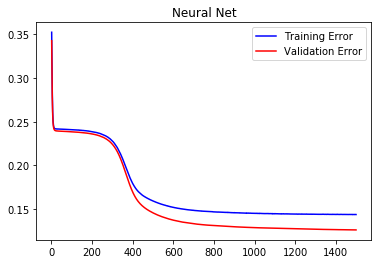

In [43]:
%matplotlib inline
nn.show_errorGraph('Neural Net', (terr, verr))

In [34]:
lognet = nn.NeuralNet(4)
lognet.addLayer(1)

# Train Logistic Net Model
(terr, verr) = lognet.train('m',trainXs.tolist(),trainYs.tolist(),validXs.tolist(),validYs.tolist(),1500,0.2)

Epoch #1 - Train Error: 0.2799735737 - Valid Error: 0.263966786999
Epoch #1 - Train Accuracy: 0.405454545455 - Valid Accuracy: 0.378048780488
Epoch #2 - Train Error: 0.25047526372 - Valid Error: 0.237762816698
Epoch #2 - Train Accuracy: 0.467272727273 - Valid Accuracy: 0.670731707317
Epoch #3 - Train Error: 0.230976537542 - Valid Error: 0.220494223938
Epoch #3 - Train Accuracy: 0.730909090909 - Valid Accuracy: 0.792682926829
Epoch #4 - Train Error: 0.218209964763 - Valid Error: 0.209105643013
Epoch #4 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #5 - Train Error: 0.20977999773 - Valid Error: 0.201049199432
Epoch #5 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #6 - Train Error: 0.20369229607 - Valid Error: 0.194983279544
Epoch #6 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #7 - Train Error: 0.19897380283 - Valid Error: 0.190173259132
Epoch #7 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.79878048780

Epoch #66 - Train Error: 0.161070887183 - Valid Error: 0.147594626269
Epoch #66 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #67 - Train Error: 0.16101827091 - Valid Error: 0.147459994916
Epoch #67 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #68 - Train Error: 0.160867673501 - Valid Error: 0.147330055748
Epoch #68 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #69 - Train Error: 0.160802973326 - Valid Error: 0.147203743349
Epoch #69 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #70 - Train Error: 0.160680309172 - Valid Error: 0.147074301038
Epoch #70 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #71 - Train Error: 0.160573787004 - Valid Error: 0.14694999137
Epoch #71 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #72 - Train Error: 0.160457012064 - Valid Error: 0.146828893159
Epoch #72 - Train Accuracy: 0.774545454545 - Valid Accur

Epoch #122 - Train Error: 0.157165641265 - Valid Error: 0.142609305908
Epoch #122 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #123 - Train Error: 0.157099559656 - Valid Error: 0.14254805781
Epoch #123 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #124 - Train Error: 0.157108305988 - Valid Error: 0.142488316904
Epoch #124 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #125 - Train Error: 0.157022256152 - Valid Error: 0.142427882666
Epoch #125 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #126 - Train Error: 0.156967346577 - Valid Error: 0.142367415603
Epoch #126 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #127 - Train Error: 0.156999520169 - Valid Error: 0.142308221466
Epoch #127 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #128 - Train Error: 0.15690533241 - Valid Error: 0.142251420285
Epoch #128 - Train Accuracy: 0.774545454545

Epoch #182 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #183 - Train Error: 0.155069886598 - Valid Error: 0.139738259235
Epoch #183 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #184 - Train Error: 0.155049113387 - Valid Error: 0.13970260884
Epoch #184 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #185 - Train Error: 0.154992878071 - Valid Error: 0.139665644576
Epoch #185 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #186 - Train Error: 0.154955027853 - Valid Error: 0.139627890248
Epoch #186 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #187 - Train Error: 0.154928540034 - Valid Error: 0.139592129666
Epoch #187 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #188 - Train Error: 0.15490945474 - Valid Error: 0.139554897139
Epoch #188 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #189 - Train Error: 0.154936393

Epoch #242 - Train Error: 0.153714742429 - Valid Error: 0.137854085074
Epoch #242 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #243 - Train Error: 0.153712585903 - Valid Error: 0.137828286971
Epoch #243 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #244 - Train Error: 0.153686902481 - Valid Error: 0.13780124758
Epoch #244 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #245 - Train Error: 0.153706265554 - Valid Error: 0.137775722431
Epoch #245 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #246 - Train Error: 0.153663349963 - Valid Error: 0.137747452007
Epoch #246 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #247 - Train Error: 0.153669426291 - Valid Error: 0.137721723914
Epoch #247 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #248 - Train Error: 0.153651105906 - Valid Error: 0.137693149025
Epoch #248 - Train Accuracy: 0.77454545454

Epoch #298 - Train Error: 0.152829313628 - Valid Error: 0.136465613172
Epoch #298 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #299 - Train Error: 0.152768309449 - Valid Error: 0.136444192785
Epoch #299 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #300 - Train Error: 0.152754614248 - Valid Error: 0.136422637773
Epoch #300 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #301 - Train Error: 0.152771513183 - Valid Error: 0.136401333123
Epoch #301 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #302 - Train Error: 0.152734437892 - Valid Error: 0.13637974445
Epoch #302 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #303 - Train Error: 0.152773675202 - Valid Error: 0.136359788409
Epoch #303 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.798780487805
Epoch #304 - Train Error: 0.152760930132 - Valid Error: 0.136336116484
Epoch #304 - Train Accuracy: 0.77454545454

Epoch #361 - Train Error: 0.151958377453 - Valid Error: 0.135178620818
Epoch #361 - Train Accuracy: 0.772727272727 - Valid Accuracy: 0.798780487805
Epoch #362 - Train Error: 0.151936386655 - Valid Error: 0.13515977662
Epoch #362 - Train Accuracy: 0.772727272727 - Valid Accuracy: 0.798780487805
Epoch #363 - Train Error: 0.151944394385 - Valid Error: 0.135140254524
Epoch #363 - Train Accuracy: 0.772727272727 - Valid Accuracy: 0.798780487805
Epoch #364 - Train Error: 0.151973943788 - Valid Error: 0.135122452453
Epoch #364 - Train Accuracy: 0.772727272727 - Valid Accuracy: 0.798780487805
Epoch #365 - Train Error: 0.15190054241 - Valid Error: 0.135103668651
Epoch #365 - Train Accuracy: 0.772727272727 - Valid Accuracy: 0.798780487805
Epoch #366 - Train Error: 0.151887391054 - Valid Error: 0.135086008971
Epoch #366 - Train Accuracy: 0.772727272727 - Valid Accuracy: 0.798780487805
Epoch #367 - Train Error: 0.151899812684 - Valid Error: 0.135067185682
Epoch #367 - Train Accuracy: 0.772727272727

Epoch #425 - Train Error: 0.151310161684 - Valid Error: 0.134072099226
Epoch #425 - Train Accuracy: 0.772727272727 - Valid Accuracy: 0.80487804878
Epoch #426 - Train Error: 0.151266135832 - Valid Error: 0.134055667234
Epoch #426 - Train Accuracy: 0.772727272727 - Valid Accuracy: 0.80487804878
Epoch #427 - Train Error: 0.151260698386 - Valid Error: 0.134040231916
Epoch #427 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.80487804878
Epoch #428 - Train Error: 0.151241679433 - Valid Error: 0.134024780747
Epoch #428 - Train Accuracy: 0.772727272727 - Valid Accuracy: 0.80487804878
Epoch #429 - Train Error: 0.151219002243 - Valid Error: 0.134010203305
Epoch #429 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.80487804878
Epoch #430 - Train Error: 0.151207510635 - Valid Error: 0.13399595023
Epoch #430 - Train Accuracy: 0.774545454545 - Valid Accuracy: 0.80487804878
Epoch #431 - Train Error: 0.151227882415 - Valid Error: 0.133980880906
Epoch #431 - Train Accuracy: 0.774545454545 - Va

Epoch #490 - Train Error: 0.150679242821 - Valid Error: 0.133107418614
Epoch #490 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.80487804878
Epoch #491 - Train Error: 0.150685805866 - Valid Error: 0.133094075285
Epoch #491 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.80487804878
Epoch #492 - Train Error: 0.150686630174 - Valid Error: 0.133080008606
Epoch #492 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.80487804878
Epoch #493 - Train Error: 0.150705348703 - Valid Error: 0.133066119012
Epoch #493 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.80487804878
Epoch #494 - Train Error: 0.150656106106 - Valid Error: 0.133051924394
Epoch #494 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.80487804878
Epoch #495 - Train Error: 0.150644673085 - Valid Error: 0.133038342256
Epoch #495 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.80487804878
Epoch #496 - Train Error: 0.150651187387 - Valid Error: 0.133026559529
Epoch #496 - Train Accuracy: 0.787272727273 - V

Epoch #553 - Train Error: 0.150223957782 - Valid Error: 0.132294416429
Epoch #553 - Train Accuracy: 0.792727272727 - Valid Accuracy: 0.817073170732
Epoch #554 - Train Error: 0.150230259354 - Valid Error: 0.132282733422
Epoch #554 - Train Accuracy: 0.792727272727 - Valid Accuracy: 0.817073170732
Epoch #555 - Train Error: 0.150198669318 - Valid Error: 0.13226976613
Epoch #555 - Train Accuracy: 0.792727272727 - Valid Accuracy: 0.817073170732
Epoch #556 - Train Error: 0.150214101834 - Valid Error: 0.132257952272
Epoch #556 - Train Accuracy: 0.790909090909 - Valid Accuracy: 0.817073170732
Epoch #557 - Train Error: 0.150227554602 - Valid Error: 0.132245428662
Epoch #557 - Train Accuracy: 0.790909090909 - Valid Accuracy: 0.817073170732
Epoch #558 - Train Error: 0.150196110693 - Valid Error: 0.132231980649
Epoch #558 - Train Accuracy: 0.792727272727 - Valid Accuracy: 0.817073170732
Epoch #559 - Train Error: 0.150182411877 - Valid Error: 0.132221048836
Epoch #559 - Train Accuracy: 0.79272727272

Epoch #611 - Train Error: 0.149868077494 - Valid Error: 0.131631925294
Epoch #611 - Train Accuracy: 0.792727272727 - Valid Accuracy: 0.817073170732
Epoch #612 - Train Error: 0.149876289338 - Valid Error: 0.131622388888
Epoch #612 - Train Accuracy: 0.792727272727 - Valid Accuracy: 0.817073170732
Epoch #613 - Train Error: 0.14986242254 - Valid Error: 0.131610772045
Epoch #613 - Train Accuracy: 0.794545454545 - Valid Accuracy: 0.817073170732
Epoch #614 - Train Error: 0.14989892426 - Valid Error: 0.13159941127
Epoch #614 - Train Accuracy: 0.792727272727 - Valid Accuracy: 0.817073170732
Epoch #615 - Train Error: 0.14984913416 - Valid Error: 0.131588720289
Epoch #615 - Train Accuracy: 0.794545454545 - Valid Accuracy: 0.817073170732
Epoch #616 - Train Error: 0.149860558666 - Valid Error: 0.131578073905
Epoch #616 - Train Accuracy: 0.792727272727 - Valid Accuracy: 0.817073170732
Epoch #617 - Train Error: 0.149818480892 - Valid Error: 0.131567314258
Epoch #617 - Train Accuracy: 0.792727272727 -

Epoch #671 - Train Error: 0.149589169934 - Valid Error: 0.131020497781
Epoch #671 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.810975609756
Epoch #672 - Train Error: 0.14954438935 - Valid Error: 0.131009976975
Epoch #672 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.810975609756
Epoch #673 - Train Error: 0.149554040866 - Valid Error: 0.131000921443
Epoch #673 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.810975609756
Epoch #674 - Train Error: 0.149529953611 - Valid Error: 0.130991096167
Epoch #674 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.810975609756
Epoch #675 - Train Error: 0.149534811402 - Valid Error: 0.130981688414
Epoch #675 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.810975609756
Epoch #676 - Train Error: 0.149560580282 - Valid Error: 0.130973526015
Epoch #676 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.810975609756
Epoch #677 - Train Error: 0.149522097635 - Valid Error: 0.130963981455
Epoch #677 - Train Accuracy: 0.78727272727

Epoch #735 - Train Error: 0.149274898264 - Valid Error: 0.130441362379
Epoch #735 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.810975609756
Epoch #736 - Train Error: 0.149261719629 - Valid Error: 0.130433976747
Epoch #736 - Train Accuracy: 0.781818181818 - Valid Accuracy: 0.810975609756
Epoch #737 - Train Error: 0.149288322435 - Valid Error: 0.13042626671
Epoch #737 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.810975609756
Epoch #738 - Train Error: 0.149275267686 - Valid Error: 0.130416724165
Epoch #738 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.810975609756
Epoch #739 - Train Error: 0.149332693459 - Valid Error: 0.130408859873
Epoch #739 - Train Accuracy: 0.781818181818 - Valid Accuracy: 0.810975609756
Epoch #740 - Train Error: 0.149261803273 - Valid Error: 0.130400266905
Epoch #740 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.810975609756
Epoch #741 - Train Error: 0.14926535622 - Valid Error: 0.130392474498
Epoch #741 - Train Accuracy: 0.783636363636

Epoch #798 - Train Error: 0.149030219474 - Valid Error: 0.129939648528
Epoch #798 - Train Accuracy: 0.781818181818 - Valid Accuracy: 0.810975609756
Epoch #799 - Train Error: 0.149028700061 - Valid Error: 0.129930729941
Epoch #799 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.810975609756
Epoch #800 - Train Error: 0.14902094643 - Valid Error: 0.129922586378
Epoch #800 - Train Accuracy: 0.78 - Valid Accuracy: 0.810975609756
Epoch #801 - Train Error: 0.149038033741 - Valid Error: 0.129913843005
Epoch #801 - Train Accuracy: 0.781818181818 - Valid Accuracy: 0.810975609756
Epoch #802 - Train Error: 0.149013036174 - Valid Error: 0.129907134064
Epoch #802 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.810975609756
Epoch #803 - Train Error: 0.149009929416 - Valid Error: 0.129899559187
Epoch #803 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.810975609756
Epoch #804 - Train Error: 0.149004350087 - Valid Error: 0.129892224118
Epoch #804 - Train Accuracy: 0.781818181818 - Valid 

Epoch #858 - Train Error: 0.148839703153 - Valid Error: 0.129507121899
Epoch #858 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.810975609756
Epoch #859 - Train Error: 0.148819554848 - Valid Error: 0.129501282215
Epoch #859 - Train Accuracy: 0.783636363636 - Valid Accuracy: 0.810975609756
Epoch #860 - Train Error: 0.148843528945 - Valid Error: 0.129495110654
Epoch #860 - Train Accuracy: 0.781818181818 - Valid Accuracy: 0.810975609756
Epoch #861 - Train Error: 0.148875598896 - Valid Error: 0.129488338999
Epoch #861 - Train Accuracy: 0.781818181818 - Valid Accuracy: 0.810975609756
Epoch #862 - Train Error: 0.148821743901 - Valid Error: 0.129480768586
Epoch #862 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.810975609756
Epoch #863 - Train Error: 0.148841255691 - Valid Error: 0.129474036542
Epoch #863 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.810975609756
Epoch #864 - Train Error: 0.148838899767 - Valid Error: 0.129466156747
Epoch #864 - Train Accuracy: 0.7836363636

Epoch #923 - Train Error: 0.148659110405 - Valid Error: 0.129084022324
Epoch #923 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.817073170732
Epoch #924 - Train Error: 0.148658848159 - Valid Error: 0.129077304058
Epoch #924 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.810975609756
Epoch #925 - Train Error: 0.148659305004 - Valid Error: 0.129072485636
Epoch #925 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.817073170732
Epoch #926 - Train Error: 0.148643907445 - Valid Error: 0.129065920645
Epoch #926 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.817073170732
Epoch #927 - Train Error: 0.14865504542 - Valid Error: 0.129060535723
Epoch #927 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.817073170732
Epoch #928 - Train Error: 0.148645144733 - Valid Error: 0.129054663112
Epoch #928 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.817073170732
Epoch #929 - Train Error: 0.14864975314 - Valid Error: 0.129048480486
Epoch #929 - Train Accuracy: 0.787272727273

Epoch #978 - Train Error: 0.148534605365 - Valid Error: 0.128770960451
Epoch #978 - Train Accuracy: 0.790909090909 - Valid Accuracy: 0.817073170732
Epoch #979 - Train Error: 0.148545504536 - Valid Error: 0.128765011479
Epoch #979 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.817073170732
Epoch #980 - Train Error: 0.148523733104 - Valid Error: 0.128760338732
Epoch #980 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.817073170732
Epoch #981 - Train Error: 0.148532946389 - Valid Error: 0.128753920256
Epoch #981 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.817073170732
Epoch #982 - Train Error: 0.148531318962 - Valid Error: 0.12874806147
Epoch #982 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.817073170732
Epoch #983 - Train Error: 0.148522329845 - Valid Error: 0.128741274756
Epoch #983 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.817073170732
Epoch #984 - Train Error: 0.148542001228 - Valid Error: 0.128734317578
Epoch #984 - Train Accuracy: 0.78727272727

Epoch #1034 - Train Error: 0.148411646662 - Valid Error: 0.128469972954
Epoch #1034 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1035 - Train Error: 0.148424798479 - Valid Error: 0.128465537485
Epoch #1035 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1036 - Train Error: 0.148390339132 - Valid Error: 0.128461282181
Epoch #1036 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1037 - Train Error: 0.14840567703 - Valid Error: 0.128455516785
Epoch #1037 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1038 - Train Error: 0.148404076765 - Valid Error: 0.12845129643
Epoch #1038 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1039 - Train Error: 0.148392874645 - Valid Error: 0.128446029345
Epoch #1039 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1040 - Train Error: 0.148397449483 - Valid Error: 0.12844133223
Epoch #1040 - Train Accuracy: 0

Epoch #1093 - Train Error: 0.148313329407 - Valid Error: 0.128186031763
Epoch #1093 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1094 - Train Error: 0.148292123094 - Valid Error: 0.128181562381
Epoch #1094 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #1095 - Train Error: 0.148317233952 - Valid Error: 0.128175890515
Epoch #1095 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #1096 - Train Error: 0.148311126376 - Valid Error: 0.128171464866
Epoch #1096 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #1097 - Train Error: 0.148320774373 - Valid Error: 0.128166331703
Epoch #1097 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1098 - Train Error: 0.148290488696 - Valid Error: 0.128162170766
Epoch #1098 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1099 - Train Error: 0.148306260603 - Valid Error: 0.128157834205
Epoch #1099 - Train Accuracy

Epoch #1149 - Train Error: 0.148210134854 - Valid Error: 0.12793892525
Epoch #1149 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1150 - Train Error: 0.148232094574 - Valid Error: 0.127934530147
Epoch #1150 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1151 - Train Error: 0.148219522082 - Valid Error: 0.127931588119
Epoch #1151 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #1152 - Train Error: 0.148217494196 - Valid Error: 0.127928061386
Epoch #1152 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1153 - Train Error: 0.148214881177 - Valid Error: 0.127923717986
Epoch #1153 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1154 - Train Error: 0.148247447914 - Valid Error: 0.127920195246
Epoch #1154 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1155 - Train Error: 0.148231633861 - Valid Error: 0.127917528341
Epoch #1155 - Train Accuracy:

Epoch #1204 - Train Error: 0.148152476207 - Valid Error: 0.127720270056
Epoch #1204 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.829268292683
Epoch #1205 - Train Error: 0.148146222769 - Valid Error: 0.127715397974
Epoch #1205 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1206 - Train Error: 0.148135646857 - Valid Error: 0.127711468072
Epoch #1206 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #1207 - Train Error: 0.148145175627 - Valid Error: 0.127707778964
Epoch #1207 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1208 - Train Error: 0.148132484533 - Valid Error: 0.127703460684
Epoch #1208 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.829268292683
Epoch #1209 - Train Error: 0.148138149916 - Valid Error: 0.127698825849
Epoch #1209 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.829268292683
Epoch #1210 - Train Error: 0.148162430843 - Valid Error: 0.127695330316
Epoch #1210 - Train Accuracy

Epoch #1265 - Train Error: 0.148048090926 - Valid Error: 0.127495052128
Epoch #1265 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1266 - Train Error: 0.148066442462 - Valid Error: 0.127493251248
Epoch #1266 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1267 - Train Error: 0.148084734676 - Valid Error: 0.127490798545
Epoch #1267 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1268 - Train Error: 0.148073319718 - Valid Error: 0.127487068719
Epoch #1268 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1269 - Train Error: 0.148069837327 - Valid Error: 0.127484337397
Epoch #1269 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1270 - Train Error: 0.148047833683 - Valid Error: 0.127480254436
Epoch #1270 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1271 - Train Error: 0.148089171519 - Valid Error: 0.127477117954
Epoch #1271 - Train Accuracy

Epoch #1323 - Train Error: 0.147991784985 - Valid Error: 0.127303369153
Epoch #1323 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1324 - Train Error: 0.148010137788 - Valid Error: 0.127300508545
Epoch #1324 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1325 - Train Error: 0.148001835939 - Valid Error: 0.127297348711
Epoch #1325 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1326 - Train Error: 0.147983039535 - Valid Error: 0.127294397692
Epoch #1326 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1327 - Train Error: 0.148003846787 - Valid Error: 0.12729182885
Epoch #1327 - Train Accuracy: 0.789090909091 - Valid Accuracy: 0.823170731707
Epoch #1328 - Train Error: 0.147987291866 - Valid Error: 0.127288286905
Epoch #1328 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1329 - Train Error: 0.148007729395 - Valid Error: 0.127285039434
Epoch #1329 - Train Accuracy:

Epoch #1380 - Train Error: 0.147997151731 - Valid Error: 0.127128177383
Epoch #1380 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1381 - Train Error: 0.14797263296 - Valid Error: 0.127125308191
Epoch #1381 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1382 - Train Error: 0.147991977983 - Valid Error: 0.127120296692
Epoch #1382 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1383 - Train Error: 0.147958947462 - Valid Error: 0.127115163129
Epoch #1383 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1384 - Train Error: 0.147935292023 - Valid Error: 0.127112501603
Epoch #1384 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1385 - Train Error: 0.147956221687 - Valid Error: 0.12710886741
Epoch #1385 - Train Accuracy: 0.785454545455 - Valid Accuracy: 0.823170731707
Epoch #1386 - Train Error: 0.147927327613 - Valid Error: 0.127106534863
Epoch #1386 - Train Accuracy: 

Epoch #1439 - Train Error: 0.147907775682 - Valid Error: 0.126959904198
Epoch #1439 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1440 - Train Error: 0.147889860908 - Valid Error: 0.126957310306
Epoch #1440 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1441 - Train Error: 0.147901892965 - Valid Error: 0.126955043258
Epoch #1441 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1442 - Train Error: 0.147936771321 - Valid Error: 0.126953192886
Epoch #1442 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1443 - Train Error: 0.147912595866 - Valid Error: 0.126949772582
Epoch #1443 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1444 - Train Error: 0.147902455308 - Valid Error: 0.126946739415
Epoch #1444 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1445 - Train Error: 0.147897836946 - Valid Error: 0.126943135297
Epoch #1445 - Train Accuracy

Epoch #1495 - Train Error: 0.147895678246 - Valid Error: 0.126814119879
Epoch #1495 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1496 - Train Error: 0.147859991837 - Valid Error: 0.126812327737
Epoch #1496 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1497 - Train Error: 0.147860377478 - Valid Error: 0.126809848537
Epoch #1497 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1498 - Train Error: 0.147911321222 - Valid Error: 0.126806024875
Epoch #1498 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1499 - Train Error: 0.147852672809 - Valid Error: 0.126803580895
Epoch #1499 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707
Epoch #1500 - Train Error: 0.147856101954 - Valid Error: 0.12680044375
Epoch #1500 - Train Accuracy: 0.787272727273 - Valid Accuracy: 0.823170731707


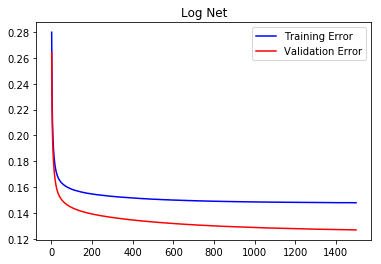

In [35]:
nn.show_errorGraph('Log Net', (terr, verr))